# Workflow Example with CLIMATE_GRID input convertor
Here we illustrate a complete workflow example using the CLIMATE GRID convertor

## Imports

In [1]:
from pathlib import Path

import xarray as xr
import pandas as pd

import valenspy as vp #The Valenspy package
from valenspy.inputconverter_functions import CLIMATE_GRID_to_CF

from yaml import safe_load
from typing import Union, List

In [2]:
#Import Converter - This input converter will not do anything to the data.
ic = vp.InputConverter(CLIMATE_GRID_to_CF)


## 1. Convert the data

### Get the filenames of ERA5 data corresponding to CORDEX variable name


In [8]:
# identify grid name to which CLIMATE_GRID is projected
gridname = 'latlon_5km'

In [9]:
manager = vp.InputManager(machine='hortense')
files = manager._get_file_paths("CLIMATE_GRID",["tas"], path_identifiers=[gridname]) #The magic happens here ! All
files

[PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/TEMP_AVG_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc')]

In [10]:

ds = xr.open_mfdataset(files, combine='by_coords')


In [11]:
CLIMATE_GRID_ds = ic.convert_input(ds) #Convert the input to the correct format
CLIMATE_GRID_ds

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


<xarray.Dataset> Size: 1GB
Dimensions:  (time: 25567, lon: 75, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (time, lat, lon) float64 1GB dask.array<chunksize=(25567, 70, 75), meta=np.ndarray>
Attributes: (12/14)
    CDI:                 Climate Data Interface version 1.9.9 (https://mpimet...
    Conventions:         CF-1.6
    creation_date:       25-06-2024
    creators:            Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:             inne.vanderkelen@meteo.be
    version:             1.1
    ...                  ...
    history:             Tue Jun 25 14:36:08 2024: cdo remapcon,latlon_5km.tx...
    CDO:                 Climate Data Operators version 1.9.9 (https://mpimet...
    dataset:             CLIMATE_GRID
    freq:                daily
    spatial_resolution:  0.07° x 0.045° (~5km)
    region:              belgium

In [12]:
# pass user defined metatadata
metadata_info = {'grid': gridname, "spatial_resolution": "0.07° x 0.045° (~5km)" }
# test of ERA5 convertor function
CLIMATE_GRID_ds = ic.convert_input(files, metadata_info) #Convert the input to the correct format
CLIMATE_GRID_ds

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


<xarray.Dataset> Size: 1GB
Dimensions:  (time: 25567, lon: 75, lat: 70)
Coordinates:
  * time     (time) datetime64[ns] 205kB 1954-01-01 1954-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Data variables:
    tas      (time, lat, lon) float64 1GB dask.array<chunksize=(13334, 34, 37), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.9 (https://mpimet.mpg....
    Conventions:    CF-1.6
    creation_date:  25-06-2024
    creators:       Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:        inne.vanderkelen@meteo.be
    version:        1.1
    affiliation:    Royal Meteorological Institute of Belgium
    projection:     +proj=lcc +lat_2=50.569898649999999 +lat_1=50.56989864999...
    history:        Tue Jun 25 14:36:08 2024: cdo remapcon,latlon_5km.txt /mn...
    CDO:            Climate Data Operators version 1.9.9 (https://mpimet.mpg....
    dataset:        CLIMATE_GRID

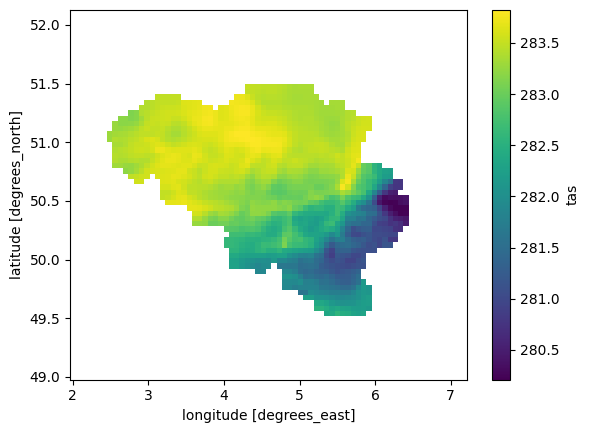

In [13]:
CLIMATE_GRID_ds['tas'].mean('time').plot()

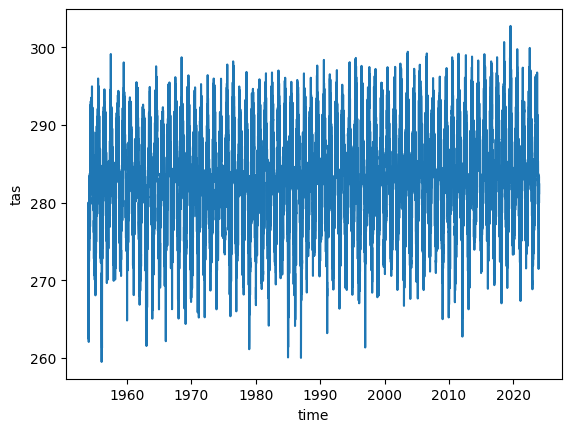

In [14]:
CLIMATE_GRID_ds['tas'].mean(dim=('lat','lon')).plot()

### Check CLIMATE_GRID for all available variables

In [15]:
# files = Path(__file__).resolve().parent -- this is not working in notebook
src_path = Path("../src/valenspy") ## -- to be removed. 

with open(src_path / "ancilliary_data" / Path("CLIMATE_GRID_lookup.yml")) as file:
    obs_LOOKUP = safe_load(file)

# check for all available variables
variables = list(obs_LOOKUP.keys())

manager = vp.InputManager(machine='hortense')
metadata_info = {'grid': gridname, "spatial_resolution": "0.07° x 0.045° (~5km)" }

CLIMATE_GRID_ds = manager.load_data("CLIMATE_GRID",variables, path_identifiers=[gridname], cf_convert=True, metadata_info = metadata_info)


File paths found:
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/HUMIDITY_RELATIVE_CLIMATE_GRID_1961_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/PRECIP_1H_MAX_CLIMATE_GRID_2020_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/EVAPOTRANS_REF_CLIMATE_GRID_1961_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/TEMP_MIN_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/TEMP_MAX_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/regridded/latlon_5km/WIND_PEAK_SPEED_CLIMATE_GRID_2019_2023_daily_latlon_5k

/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/xarray/core/indexing.py:1620: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config

The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['evspsblpot', 'hurs', 'prhmax', 'pr', 'psl', 'rsds', 'tas', 'tasmax', 'tasmin', 'sfcWindmax', 'sfcWind']


In [16]:
CLIMATE_GRID_ds['sfcWind']

<xarray.DataArray 'sfcWind' (time: 26663, lat: 70, lon: 75)> Size: 1GB
dask.array<where, shape=(26663, 70, 75), dtype=float64, chunksize=(15915, 36, 38), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 213kB 1951-01-01 1951-01-02 ... 2023-12-31
  * lon      (lon) float64 600B 2.0 2.07 2.14 2.21 2.28 ... 6.97 7.04 7.11 7.18
  * lat      (lat) float64 560B 49.0 49.05 49.09 49.13 ... 52.02 52.06 52.1
Attributes:
    long_name:           Near-Surface Wind Speed
    units:               m s-1
    description:         nan
    standard_name:       wind_speed
    original_name:       WIND_SPEED
    original_long_name:  average wind speed
    dataset:             CLIMATE_GRID
    grid:                latlon_5km
    spatial_resolution:  0.07° x 0.045° (~5km)
    path_identifiers:    ['latlon_5km']